# CS 210 - Fall 2023-2024 Course Project

**Research on My Activity Monitor Data of MacOS**

Filiz İpek Oktay - 30780

**Introduction**
In the realm of macOS, understanding and optimizing resource usage is a crucial aspect that directly impacts the performance and efficiency of applications. The project at hand focuses on delving into the intricacies of resource utilization, particularly examining the correlation between application energy impact and CPU usage.

**Road Map of the Project:**
1. **Data Collection and Preparation:** Acquire real-time metrics from macOS Activity Monitor, focusing on Energy Impact, % CPU, threads, and memory usage, and organize the data into an Excel workbook with separate sheets.

2. **Analysis and Interpretation:** Conduct exploratory data analysis to identify patterns and trends, calculate correlations between Energy Impact and CPU usage, and extract insights for optimizing application efficiency.

3. **Documentation and Finalization:** Document the methodology and findings, provide recommendations for improvement, and finalize the project report for presentation.

**Necessary Libraries**

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr
from scipy.stats import zscore

# **Importing and Clearing the Data**

The dataset has been formed from my Acitvity Monitor of my MacBook to excel sheet by copying and pasting in 10 minute intervals. On 28th of December; CPU1, Energy1, Memory1 formed in 12.20, CPU2, Energy2, Memory2 formed in 12.30, ..., CPU5, Energy5, Memory5 formed in 12.50.

In [412]:
# Define a function to convert memory values to MB
def convert_memory_to_mb(memory_str):
    # Use regular expression to extract numerical value and unit
    match = re.match(r'([\d,]+)\s*(GB|MB)', memory_str)
    
    if match:
        value, unit = match.groups()
        
        # Remove commas and convert to float
        value = float(value.replace(',', '.'))
        
        # Convert GB to MB if the unit is GB
        if unit == 'GB':
            value *= 1024
        
        return value
    else:
        return None  # Handle cases where the format is unexpected

# Replace 'your_file_path' with the actual path to your Excel file
excel_file_path = "/Users/fipek/Desktop/Desktop - Filiz’s MacBook Pro/sophomore/2.2/CS 210/Project/CS210_ActivityMonitorData.xlsx"

# Load Excel file into ExcelFile object
xls = pd.ExcelFile(excel_file_path)

# Initialize an empty dictionary to store DataFrames
all_sheets = {}

# Read all sheets into DataFrames
for i in range(1, 6):  # Assuming you have sheets from 1 to 5
    cpu_sheet_name = f'CPU{i}'
    energy_sheet_name = f'Energy{i}'
    memory_sheet_name = f'Memory{i}'

    df_cpu = pd.read_excel(xls, cpu_sheet_name)
    df_energy = pd.read_excel(xls, energy_sheet_name)
    df_memory = pd.read_excel(xls, memory_sheet_name)

    # Drop unnamed columns
    df_cpu = df_cpu.loc[:, ~df_cpu.columns.str.contains('^Unnamed')]
    df_memory = df_memory.loc[:, ~df_memory.columns.str.contains('^Unnamed')]

    # Drop rows with 0 values in CPU sheet
    df_cpu = df_cpu[(df_cpu != 0).all(axis=1)]

    # Drop rows with 0 values in Energy sheet
    df_energy = df_energy.loc[:, ~df_energy.columns.str.contains('^Unnamed')]
    df_energy = df_energy[(df_energy[['Energy Impact', '% CPU']] != 0).all(axis=1)]

    # Convert 'Memory' columns to numeric (in both CPU and Memory sheets)
    df_cpu['Memory'] = df_cpu['Memory'].apply(convert_memory_to_mb)
    df_memory['Memory'] = df_memory['Memory'].apply(convert_memory_to_mb)

    all_sheets[f'CPU{i}'] = df_cpu
    all_sheets[f'Energy{i}'] = df_energy
    all_sheets[f'Memory{i}'] = df_memory


**Sample Dataframes**

There are 5 Triple Dataset in the Excel Book. This sample is belong to the first one.

In [413]:
#Sample Data frames for First Triple Set
print(all_sheets['CPU1'].info())

print("\nCPU1 DataFrame:")
all_sheets['CPU1'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 53
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Process Name   52 non-null     object 
 1   % CPU          52 non-null     float64
 2   CPU Time       52 non-null     object 
 3   User           52 non-null     object 
 4   Memory         52 non-null     float64
 5   Energy Impact  52 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.8+ KB
None

CPU1 DataFrame:


,Process Name,% CPU,CPU Time,User,Memory,Energy Impact
0,Activity Monitor,12.3,00:06:14.910000,fipek,141.30,102.7
1,WindowServer,21.3,09:27:23.340000,_windowserver,1464.32,53.6
2,sysmond,0.9,00:04:48.720000,root,7.90,7.8
3,coreaudiod,5.8,00:59:29.870000,_coreaudiod,31.70,6.7
4,WhatsApp,0.6,00:08:00.120000,fipek,709.80,3.3


In [414]:
print(all_sheets['Energy1'].info())
print("\nEnergy1 DataFrame:")
all_sheets['Energy1'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   App Name          11 non-null     object
 1   Energy Impact     11 non-null     object
 2   12 hr Power       11 non-null     object
 3   App Nap           11 non-null     object
 4   % CPU             11 non-null     object
 5   Preventing Sleep  11 non-null     object
 6   User              11 non-null     object
 7   CPU Time          11 non-null     object
dtypes: object(8)
memory usage: 792.0+ bytes
None

Energy1 DataFrame:


,App Name,Energy Impact,12 hr Power,App Nap,% CPU,Preventing Sleep,User,CPU Time
0,Activity Monitor,39,10.78,No,4.1,No,fipek,00:06:16.540000
1,Google Chrome,1.9,125.85,No,1,No,fipek,03:02:20.510000
2,Spotify,1.5,16.53,No,1.6,Yes,fipek,00:07:25.570000
3,Figma,0.4,-,No,0.2,No,fipek,00:20:50.950000
4,Finder,0.2,-,No,0.3,No,fipek,00:39:10.340000


In [415]:
print(all_sheets['Memory1'].info())
print("\nMemory1 DataFrame:")
all_sheets['Memory1'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Process Name  918 non-null    object 
 1   Memory        918 non-null    float64
 2   Threads       918 non-null    int64  
 3   Ports         918 non-null    int64  
 4   PID           918 non-null    int64  
 5   User          918 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 43.2+ KB
None

Memory1 DataFrame:


,Process Name,Memory,Threads,Ports,PID,User
0,QuickLookSatellite,2304.00,6,292,24038,fipek
1,WhatsApp Helper (Renderer),1689.60,22,366,61758,fipek
2,WindowServer,1454.08,29,8321,424,_windowserver
3,Maps,911.40,19,1061,18725,fipek
4,Creative Cloud UI Helper (Renderer),873.50,32,1086,2492,fipek


# **Preliminary Analysis**

**1. Descriptive Statistics:**

For all sheets in the workbook.

In [416]:
# Find all CPU sheets
cpu_sheets = [key for key in all_sheets.keys() if 'CPU' in key]

# Iterate through all CPU sheets and show the description
for cpu_sheet_key in cpu_sheets:
    print(f"{cpu_sheet_key}:\n")
    print(all_sheets[cpu_sheet_key].describe())
    print("========================================\n")


CPU1:

           % CPU       Memory  Energy Impact
count  52.000000    52.000000      52.000000
mean    1.228846   190.667692       3.776923
std     3.404975   345.023321      15.855754
min     0.100000     2.100000       0.100000
25%     0.100000    13.625000       0.100000
50%     0.200000    41.350000       0.300000
75%     0.750000   188.550000       0.850000
max    21.300000  1689.600000     102.700000

CPU2:

           % CPU       Memory  Energy Impact
count  55.000000    55.000000      55.000000
mean    1.270909   179.486545       6.190909
std     3.599983   338.651082      25.923008
min     0.100000     4.200000       0.100000
25%     0.100000    13.100000       0.100000
50%     0.200000    32.100000       0.400000
75%     0.900000   154.800000       1.200000
max    23.100000  1689.600000     171.900000

CPU3:

           % CPU       Memory  Energy Impact
count  73.000000    73.000000      73.000000
mean    1.083562   156.872877       4.808219
std     2.561955   319.321655   

In [417]:
# Assuming you have loaded all sheets into DataFrames and stored them in the 'all_sheets' dictionary

# Find all Energy sheets
energy_sheets = [key for key in all_sheets.keys() if 'Energy' in key]

# Iterate through all Energy sheets and show the description
for energy_sheet_key in energy_sheets:
    print(f"{energy_sheet_key}:\n")
    print(all_sheets[energy_sheet_key].describe())
    print("========================================\n")


Energy1:

                 App Name  Energy Impact 12 hr Power App Nap  % CPU  \
count                  11           11.0          11      11   11.0   
unique                 11            7.0           9       3    7.0   
top      Activity Monitor            0.1           -      No    0.2   
freq                    1            4.0           3       8    3.0   

       Preventing Sleep   User         CPU Time  
count                11     11               11  
unique                3      2               11  
top                  No  fipek  00:06:16.540000  
freq                  9     10                1  

Energy2:

         App Name  Energy Impact 12 hr Power App Nap  % CPU Preventing Sleep  \
count          12           12.0          12      12   12.0               12   
unique         12           10.0          10       3    9.0                3   
top      WhatsApp            0.1           -      No    0.1               No   
freq            1            3.0           3       9 

In [418]:
# Find all Memory sheets
memory_sheets = [key for key in all_sheets.keys() if 'Memory' in key]

# Iterate through all Memory sheets and show the description
for memory_sheet_key in memory_sheets:
    print(f"{memory_sheet_key}:\n")
    print(all_sheets[memory_sheet_key].describe())
    print("========================================\n")


Memory1:

            Memory     Threads        Ports           PID
count   918.000000  918.000000   918.000000    918.000000
mean     28.870458    4.702614   162.030501  11493.520697
std     129.120860   22.990392   422.794885  18073.614144
min       1.100000    1.000000     0.000000      0.000000
25%       3.600000    2.000000    33.000000    871.250000
50%       7.300000    2.000000    65.000000   2026.500000
75%      13.325000    3.000000   157.500000  14657.250000
max    2304.000000  678.000000  8321.000000  67649.000000

Memory2:

            Memory     Threads        Ports           PID
count   921.000000  921.000000   921.000000    921.000000
mean     28.897068    4.724213   162.512486  11678.206298
std     129.302562   22.967178   426.317605  18331.344631
min       1.100000    1.000000     0.000000      0.000000
25%       3.600000    2.000000    33.000000    872.000000
50%       7.300000    2.000000    65.000000   2220.000000
75%      13.100000    3.000000   157.000000  14661.

**2. Visualization**

In [419]:
# Assuming you have loaded all CPU sheets into DataFrames and stored them in the 'all_sheets' dictionary
cpu_sheets = [all_sheets[f'CPU{i}'] for i in range(1, 6) if f'CPU{i}' in all_sheets]

# Concatenate CPU sheets into a single DataFrame, dropping duplicates based on 'Process Name'
all_cpu_data = pd.concat(cpu_sheets, ignore_index=True).drop_duplicates(subset='Process Name')

# Concatenate Energy sheets into a single DataFrame
all_energy_data = pd.concat([all_sheets[f'Energy{i}'] for i in range(1, 6) if f'Energy{i}' in all_sheets], ignore_index=True).drop_duplicates(subset='App Name')

# Concatenate Memory sheets into a single DataFrame
all_memory_data = pd.concat([all_sheets[f'Memory{i}'] for i in range(1, 6) if f'Memory{i}' in all_sheets], ignore_index=True)


CPU Sheets Visualizations:



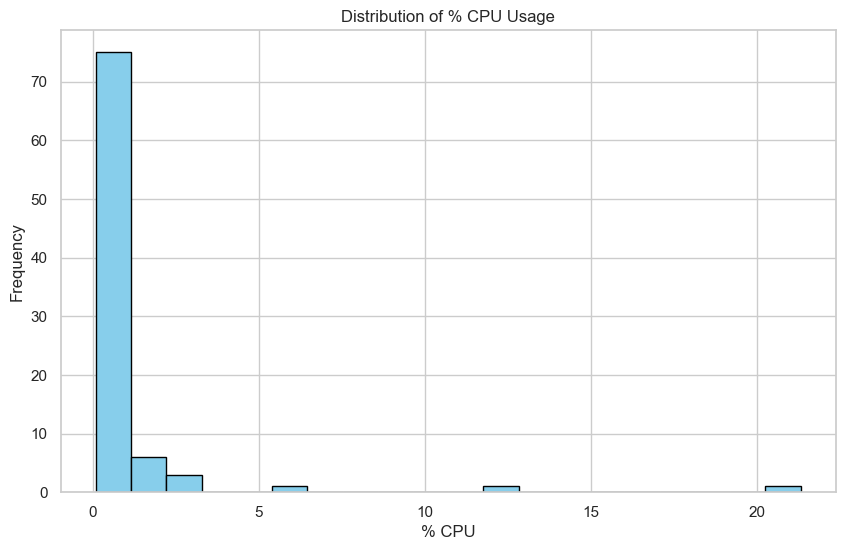

In [420]:
# Visualizations
print("CPU Sheets Visualizations:\n")

# 1. Histogram of % CPU Usage
plt.figure(figsize=(10, 6))
plt.hist(all_cpu_data['% CPU'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of % CPU Usage')
plt.xlabel('% CPU')
plt.ylabel('Frequency')
plt.show()

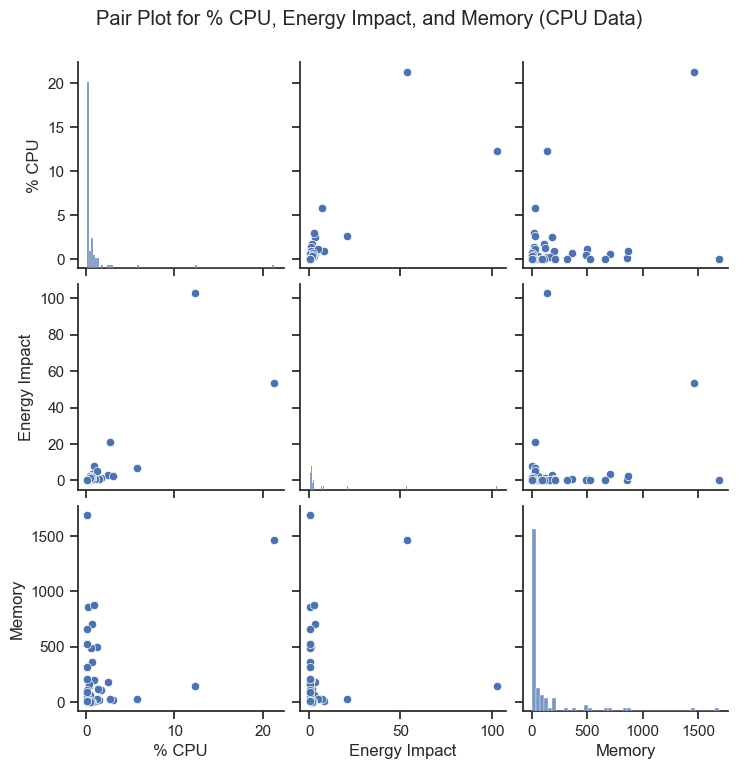

In [421]:
# 2. Pair Plot for CPU data
data_columns_cpu = ['% CPU', 'Energy Impact', 'Memory']
sns.set(style="ticks")
pair_plot_cpu = sns.pairplot(all_cpu_data[data_columns_cpu])
pair_plot_cpu.fig.subplots_adjust(top=0.95)
pair_plot_cpu.fig.suptitle('Pair Plot for % CPU, Energy Impact, and Memory (CPU Data)', y=1.02)
plt.show()


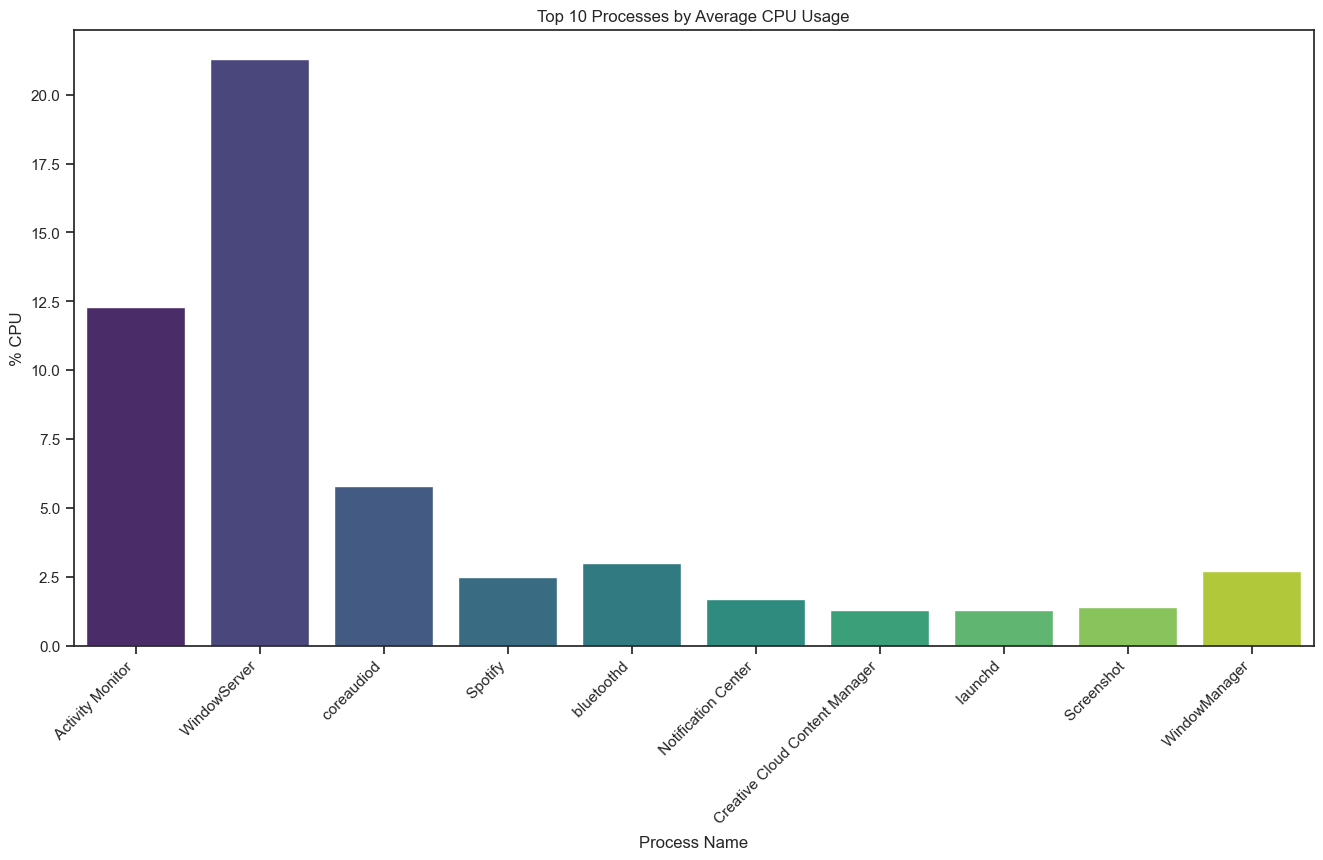

In [422]:
## 3. Bar plot of Top 10 Processes by Average CPU Usage
top_n = 10
top_n_names_cpu = all_cpu_data.groupby('Process Name')['% CPU'].mean().sort_values(ascending=False).head(top_n).index
top_n_data_cpu = all_cpu_data[all_cpu_data['Process Name'].isin(top_n_names_cpu)]
plt.figure(figsize=(16, 8))
sns.barplot(x='Process Name', y='% CPU', data=top_n_data_cpu, palette='viridis')
plt.title(f'Top {top_n} Processes by Average CPU Usage')
plt.xticks(rotation=45, ha='right')
plt.show()


Energy Sheets Visualizations:



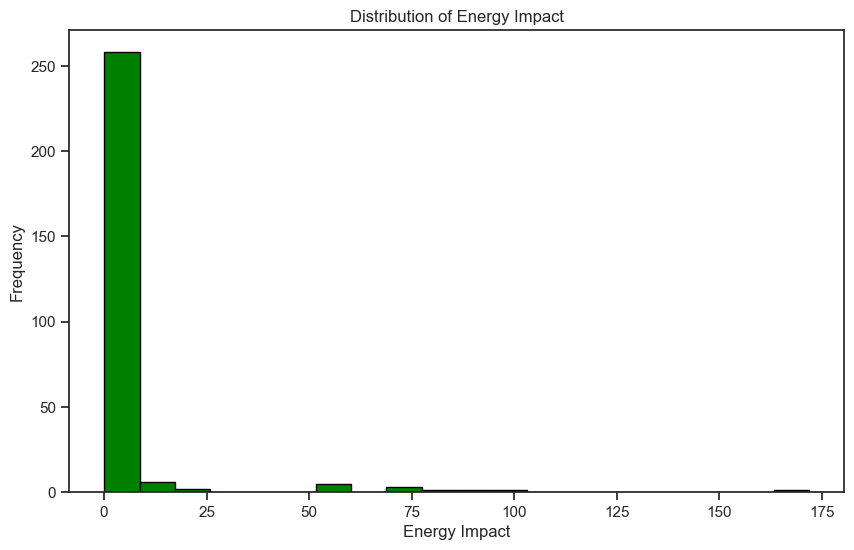

In [423]:
# Assuming you have loaded all energy sheets into DataFrames and stored them in the 'all_sheets' dictionary
energy_sheets = [all_sheets[f'Energy{i}'] for i in range(1, 6) if f'Energy{i}' in all_sheets]

# Concatenate CPU sheets into a single DataFrame
all_energy_data = pd.concat(cpu_sheets, ignore_index=True)

# Visualizations
print("Energy Sheets Visualizations:\n")

# Convert 'Energy Impact' column to numeric, coerce errors to NaN
all_energy_data['Energy Impact'] = pd.to_numeric(all_energy_data['Energy Impact'], errors='coerce')

# 4. Histogram of Energy Impact
plt.figure(figsize=(10, 6))
plt.hist(all_energy_data['Energy Impact'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Distribution of Energy Impact')
plt.xlabel('Energy Impact')
plt.ylabel('Frequency')
plt.show()


Top 10 Energy-Impacting App Names:


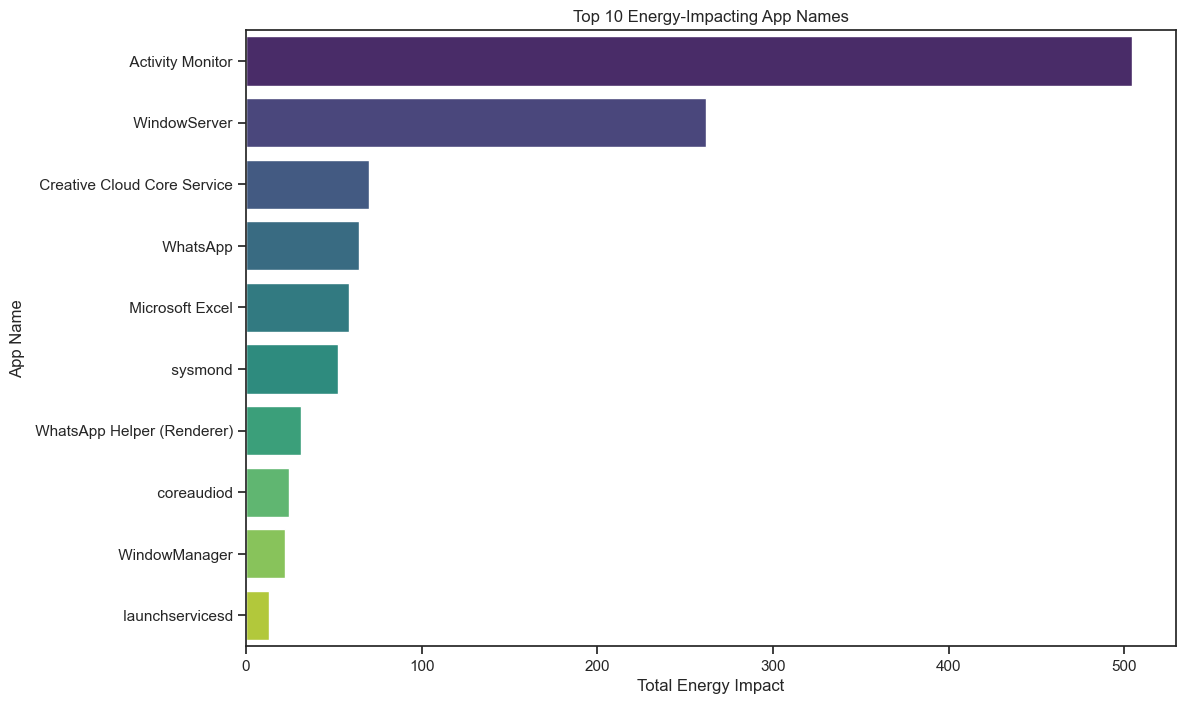

In [424]:
# Group by 'App Name' and sum the 'Energy Impact'
total_energy_impact = all_energy_data.groupby('Process Name')['Energy Impact'].sum()

# Get the top 10 energy-impacting app names
top_10_energy_apps = total_energy_impact.sort_values(ascending=False).head(10)

# Print or use the top 10 energy-impacting app names
print("Top 10 Energy-Impacting App Names:")

# 5. Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_energy_apps.values, y=top_10_energy_apps.index, palette='viridis')
plt.title('Top 10 Energy-Impacting App Names')
plt.xlabel('Total Energy Impact')
plt.ylabel('App Name')
plt.show()


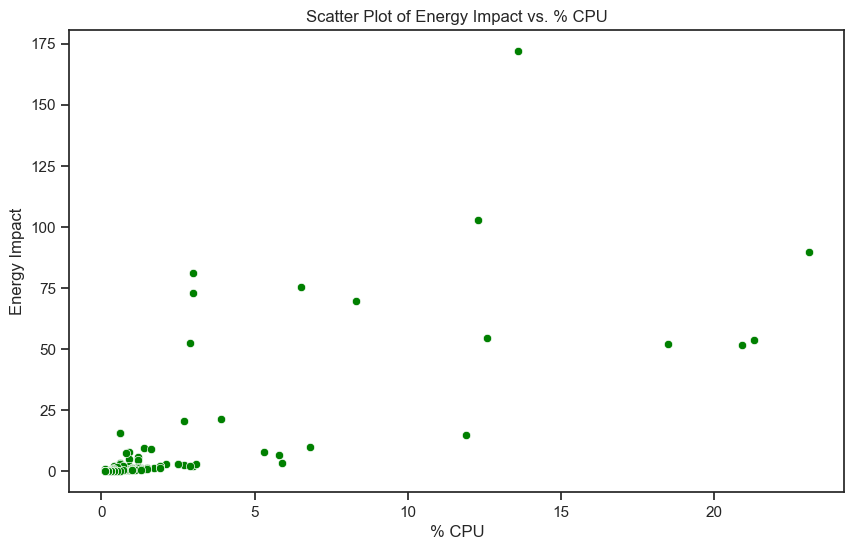

In [425]:
# Convert '% CPU' column to numeric, coerce errors to NaN
all_energy_data['% CPU'] = pd.to_numeric(all_energy_data['% CPU'], errors='coerce')

# 6. Scatter Plot of Energy Impact vs. % CPU
plt.figure(figsize=(10, 6))
sns.scatterplot(x='% CPU', y='Energy Impact', data=all_energy_data, color='green')
plt.title('Scatter Plot of Energy Impact vs. % CPU')
plt.xlabel('% CPU')
plt.ylabel('Energy Impact')
plt.show()


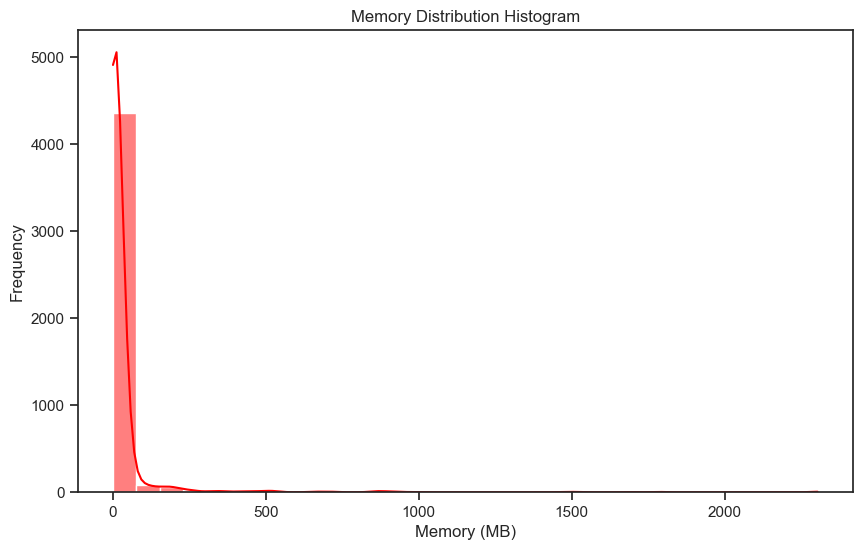

In [426]:
# Assuming you have loaded all memory sheets into DataFrames and stored them in the 'all_sheets' dictionary
memory_sheets = [all_sheets[f'Memory{i}'] for i in range(1, 6) if f'Memory{i}' in all_sheets]

# Concatenate memory sheets into a single DataFrame
memory_data = pd.concat(memory_sheets, ignore_index=True)

# Remove rows with missing or None values in the 'Memory' column
memory_data = memory_data.dropna(subset=['Memory'])

# Get the top 10 process names by average memory usage
top_n_names = memory_data.groupby('Process Name')['Memory'].mean().sort_values(ascending=False).head(10).index
top_n_data = memory_data[memory_data['Process Name'].isin(top_n_names)]

# Visualization 7: Memory Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(memory_data['Memory'], kde=True, color='red', bins=30)
plt.title('Memory Distribution Histogram')
plt.xlabel('Memory (MB)')
plt.ylabel('Frequency')
plt.show()


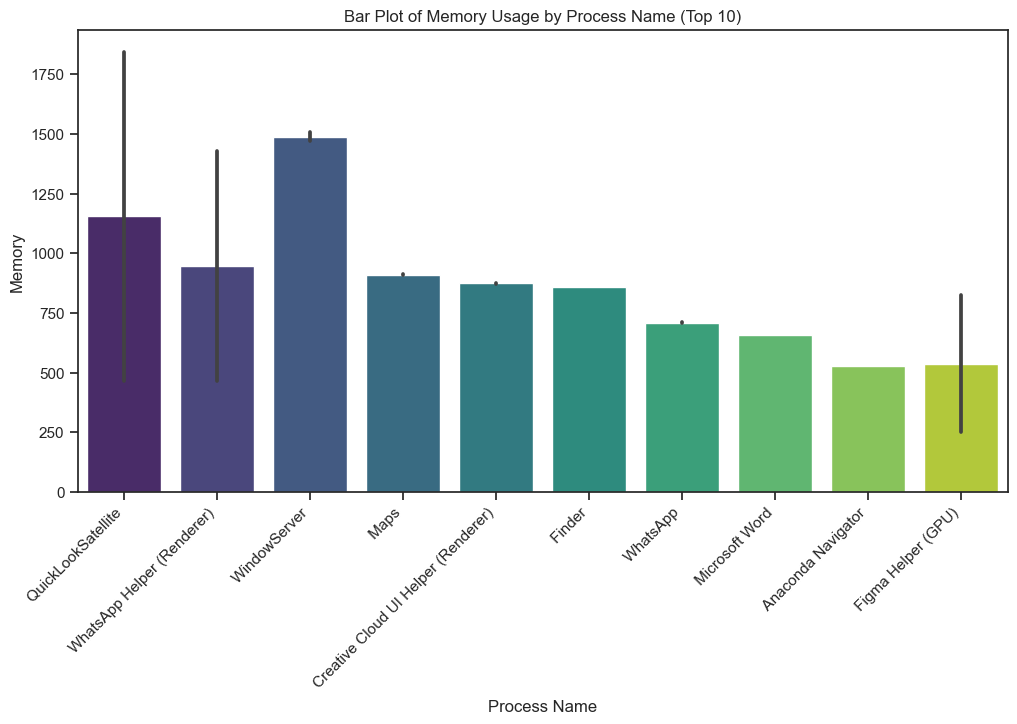

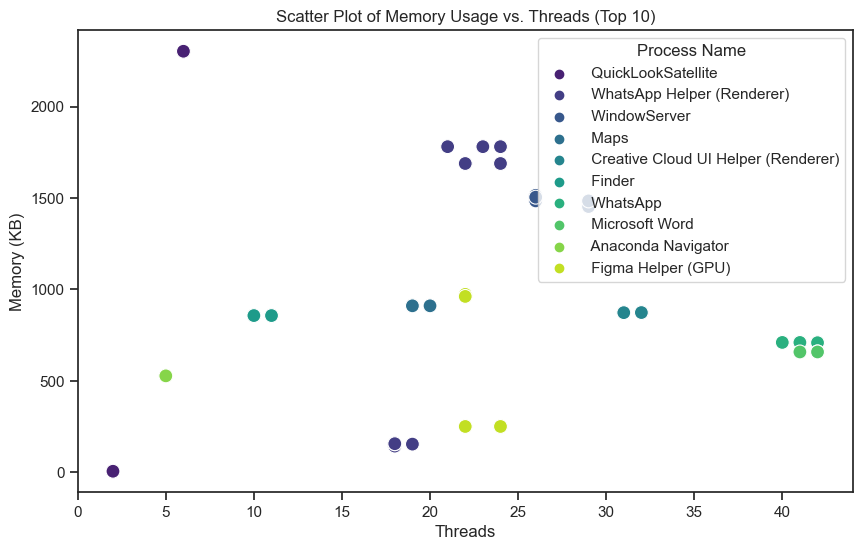

In [427]:
# Visualization 8: Bar Plot of Memory Usage by Process Name (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Process Name', y='Memory', data=top_n_data, palette='viridis')
plt.title('Bar Plot of Memory Usage by Process Name (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 9: Scatter Plot of Memory Usage vs. Threads (Top 10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Threads', y='Memory', data=top_n_data, hue='Process Name', palette='viridis', s=100)
plt.title('Scatter Plot of Memory Usage vs. Threads (Top 10)')
plt.xlabel('Threads')
plt.ylabel('Memory (KB)')
plt.show()


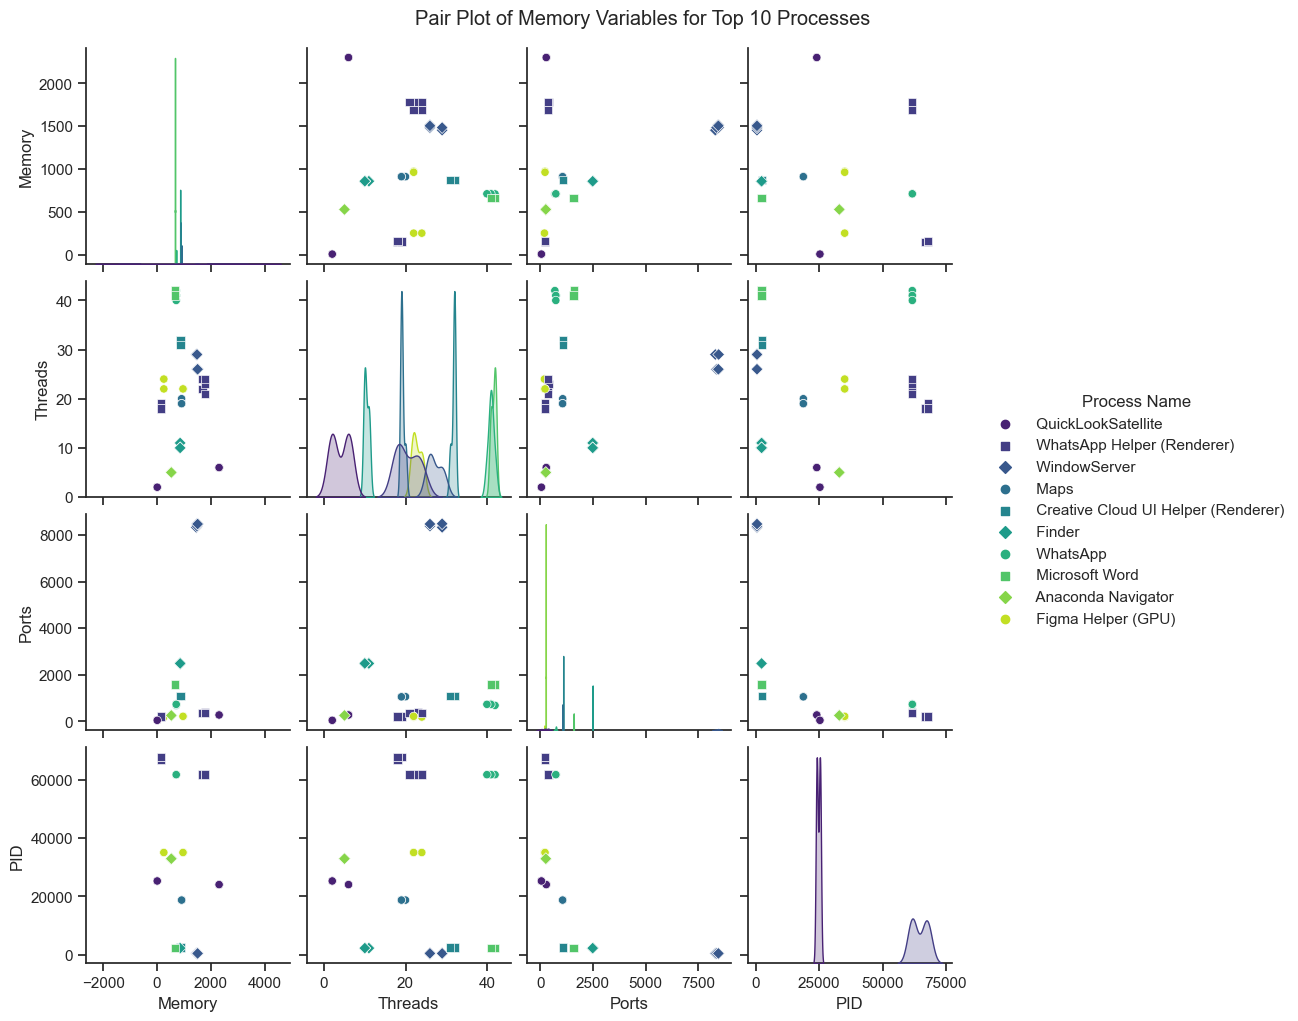

In [428]:
# Get the top 10 process names by average memory usage
top_n_names = memory_data.groupby('Process Name')['Memory'].mean().sort_values(ascending=False).head(10).index
top_n_data = memory_data[memory_data['Process Name'].isin(top_n_names)]

# 10. Pair Plot of Memory Variables
sns.set_theme(style="ticks")
sns.pairplot(top_n_data, hue="Process Name", palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Memory Variables for Top 10 Processes', y=1.02)
plt.show()

# Hyphothesis Testing

Null Hypothesis (H0):
There is no significant correlation between application energy impact and CPU usage.

Alternative Hypothesis (H1):
There is a significant correlation between application energy impact and CPU usage.

In [429]:
# Assuming 'all_cpu_data' is your DataFrame with relevant columns
energy_impact = all_cpu_data['Energy Impact']
cpu_usage = all_cpu_data['% CPU']

# Ensure that both Series have the same indices
energy_impact, cpu_usage = energy_impact.align(cpu_usage, join='inner')

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(energy_impact, cpu_usage)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")


Pearson Correlation Coefficient: 0.8153099224252177
P-value: 7.102431492512779e-22
Reject the null hypothesis. There is a significant correlation.


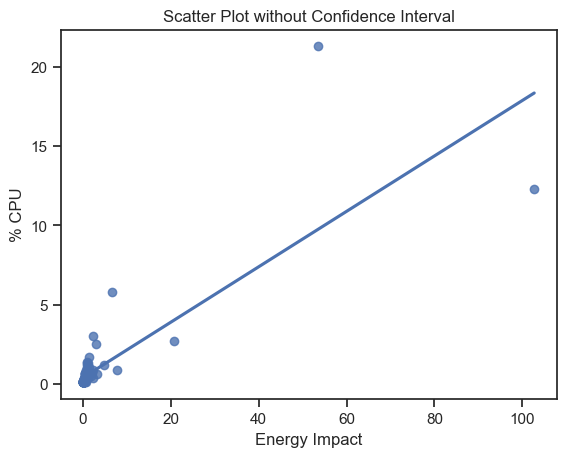

In [430]:
# 11. Scatter plot without the confidence interval
sns.regplot(x='Energy Impact', y='% CPU', data=all_cpu_data, ci=None)
plt.title('Scatter Plot without Confidence Interval')
plt.xlabel('Energy Impact')
plt.ylabel('% CPU')
plt.show()


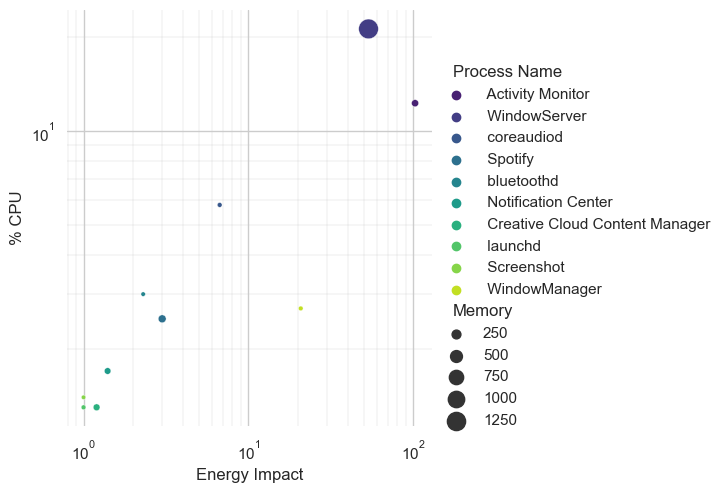

In [431]:
# Assuming 'Energy Impact' and '% CPU' are the relevant columns in your DataFrame
# If not, replace them with the correct column names
data = all_cpu_data[['Energy Impact', '% CPU', 'Memory', 'Process Name']]

# Get the top 10 processes based on some criteria (e.g., highest average % CPU)
top_processes = data.groupby('Process Name').mean().nlargest(10, '% CPU').index

# Filter data for the top 10 processes
data_top_10 = data[data['Process Name'].isin(top_processes)]

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create a cubehelix color palette
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# 12. Create a scatter plot for the top 10 processes
g = sns.relplot(
    data=data_top_10,
    x="Energy Impact", y="% CPU",
    hue="Process Name", size="Memory",
    palette="viridis", sizes=(10, 200),
)
g.set(xscale="log", yscale="log")

# Add gridlines for better readability
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

# Remove spines for a cleaner appearance
g.despine(left=True, bottom=True)

# Show the plot
plt.show()


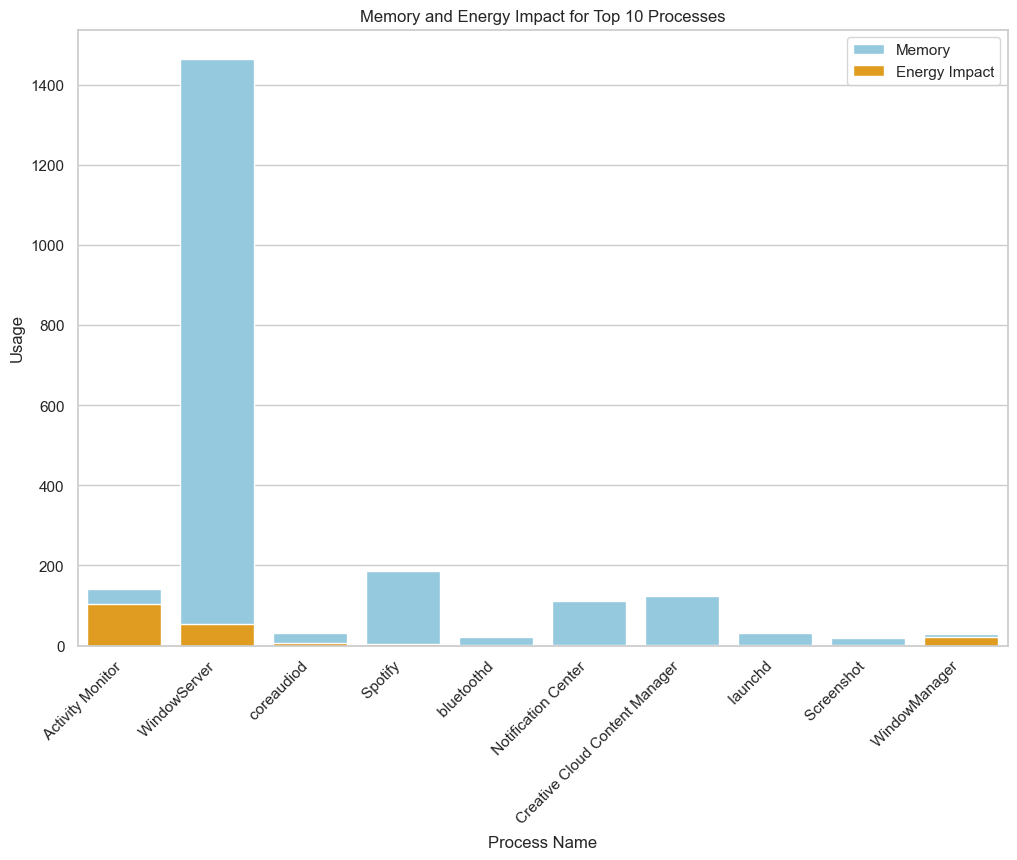

In [432]:
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 13. Create a bar chart for Memory and Energy Impact for the top 10 processes
plt.figure(figsize=(12, 8))

# Assuming 'Memory' and 'Energy Impact' are the relevant columns
sns.barplot(x="Process Name", y="Memory", data=data_top_10, color="skyblue", label="Memory")
sns.barplot(x="Process Name", y="Energy Impact", data=data_top_10, color="orange", label="Energy Impact")

# Set labels and title
plt.xlabel("Process Name")
plt.ylabel("Usage")
plt.title("Memory and Energy Impact for Top 10 Processes")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


Activity Monitor: This is the built-in macOS application that provides information about system resource usage and running processes.

WindowServer: Responsible for rendering the graphical user interface (GUI) on macOS.

coreaudiod: Handles audio services on macOS.

Spotify: A popular music streaming application.

bluetoothd: The Bluetooth daemon, responsible for managing Bluetooth connections.

Notification Center: Manages notifications on macOS.

Creative Cloud Content Manager: Associated with Adobe Creative Cloud, used for managing Adobe software and services.

launchd: The system and service manager for macOS.

Screenshot: Likely related to taking screenshots on the system.

WindowManager: Generic name, but could be related to managing windows and UI 

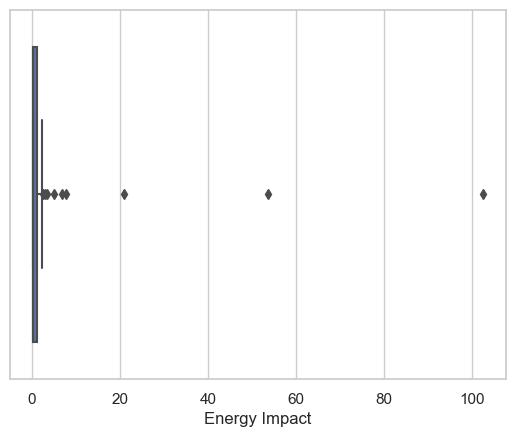

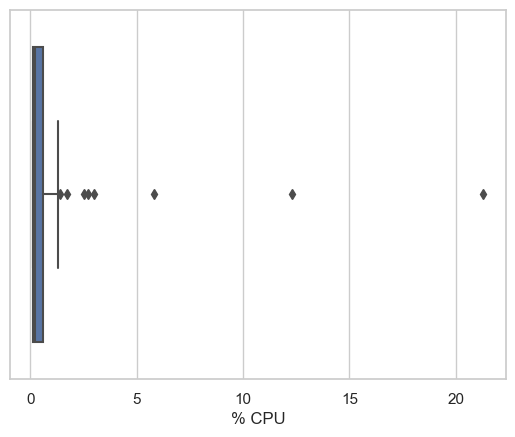

In [433]:
# 14. Assuming 'Energy Impact' and '% CPU' are the relevant columns
sns.boxplot(x=data['Energy Impact'])
plt.show()

sns.boxplot(x=data['% CPU'])
plt.show()


Outliers in Energy Impact:
   Energy Impact  % CPU   Memory       Process Name
0          102.7   12.3   141.30   Activity Monitor
1           53.6   21.3  1464.32       WindowServer

Outliers in % CPU:
   Energy Impact  % CPU   Memory       Process Name
0          102.7   12.3   141.30   Activity Monitor
1           53.6   21.3  1464.32       WindowServer


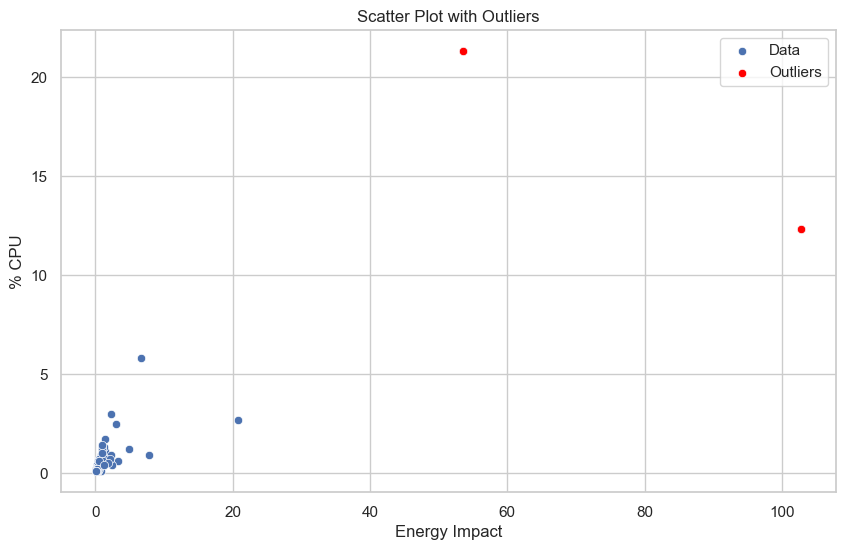

In [434]:
# Assuming 'Energy Impact' and '% CPU' are the relevant columns
z_scores_energy = zscore(data['Energy Impact'])
z_scores_cpu = zscore(data['% CPU'])

# Identify outliers based on a threshold (e.g., Z-score > 3)
outliers_energy = data[abs(z_scores_energy) > 3]
outliers_cpu = data[abs(z_scores_cpu) > 3]

# Explore Outliers
print("Outliers in Energy Impact:")
print(outliers_energy)

print("\nOutliers in % CPU:")
print(outliers_cpu)

# Visualize Outliers
# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 15. Create a scatter plot for 'Energy Impact' and '% CPU'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy Impact', y='% CPU', data=data, label='Data')
sns.scatterplot(x='Energy Impact', y='% CPU', data=outliers_energy, color='red', label='Outliers')
plt.title('Scatter Plot with Outliers')
plt.xlabel('Energy Impact')
plt.ylabel('% CPU')
plt.legend()
plt.show()

# Statistical Summary
# Summary statistics without outliers
summary_no_outliers = data.describe()

# Summary statistics with outliers
summary_with_outliers = pd.concat([data.describe(), outliers_energy.describe(), outliers_cpu.describe()], axis=1)

# Consideration for Removal or Transformation
# Remove outliers from the original DataFrame
data_no_outliers = data[~data.index.isin(outliers_energy.index) & ~data.index.isin(outliers_cpu.index)]

# Feedback to Previous Analysis
# Continue your analysis pipeline with the new DataFrame (data_no_outliers) if needed


**Outliers in Energy Impact:**

Activity Monitor (Energy Impact: 102.7, % CPU: 12.3): This process exhibits a higher-than-average 'Energy Impact' while having a relatively moderate '% CPU' usage. The elevated energy impact could be due to specific characteristics of the Activity Monitor application.

WindowServer (Energy Impact: 53.6, % CPU: 21.3): WindowServer shows an unusual combination of 'Energy Impact' and '% CPU.' It might be worth investigating the reasons behind this behavior, as it could be related to the nature of the WindowServer process.

Outliers in % CPU:
Both "Activity Monitor" and "WindowServer" are consistent outliers in terms of '% CPU' usage.



In [435]:
import pandas as pd

# Assuming 'Process Name', '% CPU', and 'Energy Impact' are the relevant columns
filtered_cpu_data = all_cpu_data[all_cpu_data['User'] == 'fipek'][['Process Name', '% CPU']]

# Print the filtered CPU data
print("Filtered CPU Data for User 'fipek':")
filtered_cpu_data

Filtered CPU Data for User 'fipek':


,Process Name,% CPU
0,Activity Monitor,12.3
4,WhatsApp,0.6
5,Spotify,2.5
7,Notification Center,1.7
9,Creative Cloud Content Manager,1.3
11,Google Chrome,1.2
12,Screenshot,1.4
13,Google Chrome Helper (GPU),0.9
16,PaperKitExtension (Notes),0.7
19,Universal Control,0.6


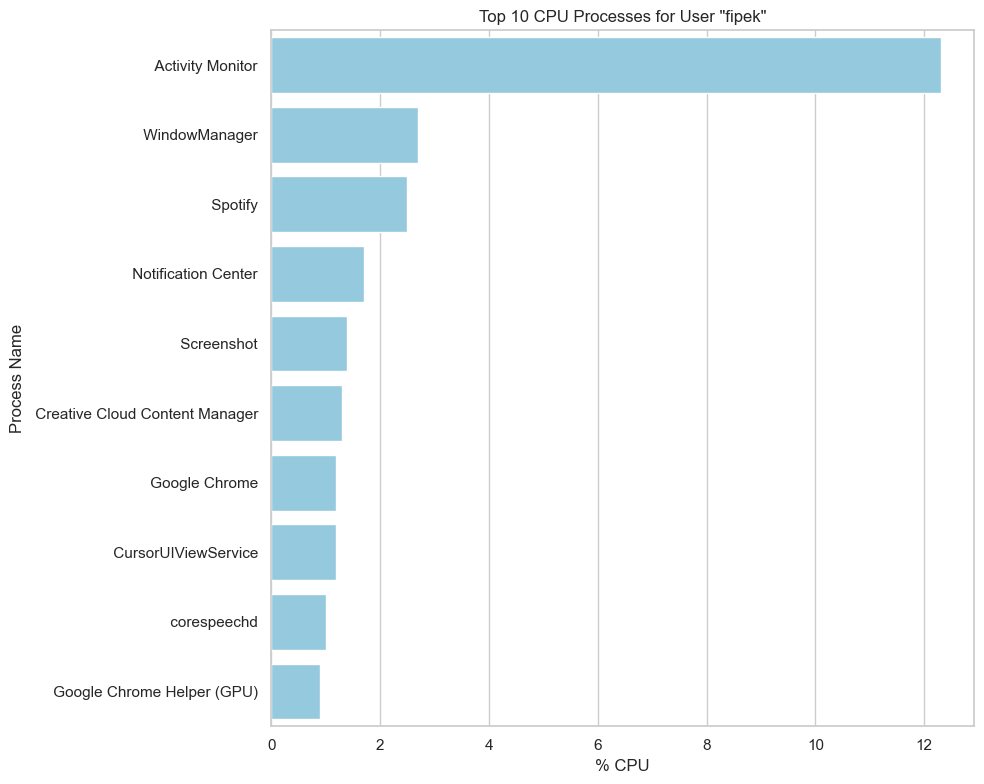

In [436]:
# Assuming 'Process Name', '% CPU', and 'Energy Impact' are the relevant columns
filtered_cpu_data = all_cpu_data[all_cpu_data['User'] == 'fipek'][['Process Name', '% CPU']]

# Find the top processes based on CPU percentage
top_cpu_processes = filtered_cpu_data.nlargest(10, '% CPU')

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# 16. Create a horizontal bar chart for the top CPU processes
plt.figure(figsize=(10, 8))
sns.barplot(x='% CPU', y='Process Name', data=top_cpu_processes, color='skyblue')
plt.xlabel('% CPU')
plt.ylabel('Process Name')
plt.title('Top 10 CPU Processes for User "fipek"')
plt.tight_layout()

# Show the plot
plt.show()


User Behavior Analysis for 'fipek':

1. **Active System Monitoring:** The substantial CPU usage by "Activity Monitor" indicates a proactive approach to monitoring and managing system processes, showcasing an interest in optimizing system performance.

2. **Efficient Workspace Management:** The presence of "WindowManager" and its significant CPU usage suggests adept multitasking and efficient window management, reflecting a streamlined and organized workspace.

3. **Entertainment Enjoyment:** The inclusion of "Spotify" in the top processes signifies a preference for music, reflecting an interest in entertainment and potentially using music to enhance the work environment.

4. **Engagement with Notifications:** The CPU usage by "Notification Center" suggests regular interaction with system notifications, indicating a commitment to staying informed about various events on the computer.

5. **Content Creation and Capture:** Processes like "Creative Cloud Content Manager" and "Screenshot" point towards engagement in creative activities, showcasing involvement in content creation and the management of visual content.

6. **Web Browsing and Information Gathering:** The presence of "Google Chrome" and related processes indicates active web browsing, likely for information gathering, entertainment, or work-related tasks.

7. **Speech-related Activities:** The presence of "corespeechd" suggests engagement with speech-related functionalities, indicating potential use of voice recognition or other speech-related activities.

8. **Graphics-intensive Tasks:** The appearance of "Google Chrome Helper (GPU)" suggests involvement in graphics-intensive features or websites within the Chrome browser.

In summary, the user 'fipek' exhibits a diverse and well-rounded usage pattern, incorporating elements of productivity, entertainment, content creation, and efficient multitasking. The proactive system monitoring and organized workspace management reflect a user who values optimizing their computing experience for both work and leisure.